In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler 
import random as rd

In [216]:
iris = pd.read_csv(".\data\IRIS.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [256]:
class k_means:
    def __init__(self, k):
        iris = pd.read_csv(".\data\IRIS.csv")
        self.x = iris.iloc[:, [0, 1, 2, 3]].values #iris data set __ dimension n x f
        self.n_samples = self.x.shape[0] #number of samples
        self.f_features = self.x.shape[1] #number of features
        self.k_clusters = k
        self.learning_rate = 1
        self.r = np.zeros((self.n_samples,self.k_clusters)) #assign parameters array 0-1 __ dimension: n x k 
        self.mu = np.array((self.k_clusters, self.f_features)) #centroids (cluster means) array __ dimension k x f
        self.distortion_arr = []
        self.mu_arr = []
        self.initialize_centroids()

        
    def initialize_centroids(self):
    #Initialize random centroids
        cluster_centroids = []
        for n in range(self.k_clusters):
            centroid = []
            for f in range(4):
                f_max = np.amax(self.x[:,f])
                f_min = np.amin(self.x[:,f])
                centroid.append(rd.uniform(f_max, f_min))
            cluster_centroids.append(centroid)
        self.mu = np.array(cluster_centroids)
        self.assign_clusters()
        if (not self.valid_centroids()):
            self.initialize_centroids()

    def initialize_centroids_from_data(self, k):
        s = np.random.randint(low = 0, high = self.n_samples, size = self.k_clusters)
        centroids = []
        for i in range(self.k_clusters):
            centroids.append(x[s[i],:].tolist())
        self.mu = np.array(centroids)
        self.assign_clusters()

    
    def assign_clusters(self):
        self.r = np.zeros(self.r.shape)
        for n in range(self.n_samples):
            belong_to = -1
            min_dist = float('inf') 
            for k in range(self.k_clusters):
                distance_to_k = np.sum(np.square(np.subtract(self.x[n], self.mu[k])))
                if distance_to_k < min_dist:
                    min_dist = distance_to_k
                    belong_to = k
            self.r[n][belong_to] = 1 
        self.distortion_arr.append(self.calculate_distortion())
        self.mu_arr.append(self.mu)

    def valid_centroids(self):
        count = self.r.sum(axis=0)
        for k in range(self.k_clusters):
            if (count[k] == 0): return False
        return True


    def calculate_updated_centroids(self):
        updated = np.zeros(self.mu.shape) # k x f ) 
        for k in range(self.k_clusters):
                for n in range(self.n_samples):
                    updated[k] += self.r[n][k]*(self.x[n])
                updated[k] = updated[k]/self.r.sum(axis=0)[k]
        return updated

    def calculate_distortion(self):
        D = 0
        for n in range(self.n_samples):
            for k in range(self.k_clusters):
                D += np.sum(self.r[n][k]*np.square(np.subtract(self.x[n],self.mu[k])))
        return D
    
    def converged(self): #convergence criterion: new assignment doesn't change the cluster centers by over 0.5% of the initial centroids
        update_mu = self.calculate_updated_centroids()
        return np.array_equiv(self.mu, update_mu)

    def update_centroids(self):
        self.mu = self.calculate_updated_centroids()
        self.assign_clusters()

    #get the current assignment array n x 1
    def get_assignment(self):
        assignment = np.ndarray(self.n_samples)
        for n in range(self.n_samples): 
            for k in range(self.k_clusters):
                if (self.r[n][k] == 1):
                    assignment[n] = k
                    break
        return assignment


    def iterate(self):
        while (not self.converged()):
            self.update_centroids()
            
        



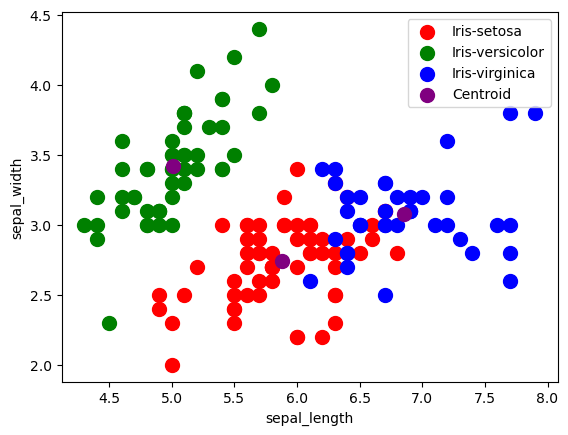

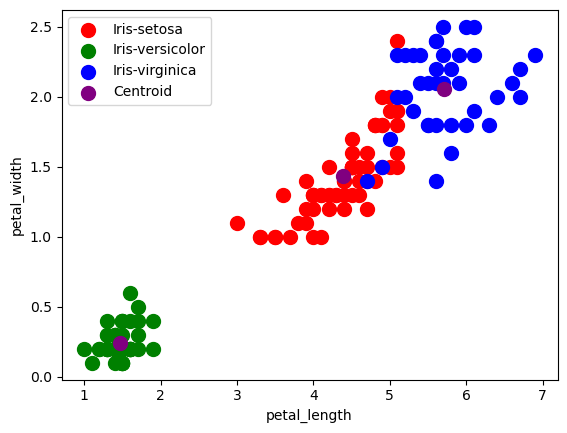

In [257]:

test = k_means(3)
test.iterate()
type = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
color = ["red", "green", "blue"]

def plot_clustering(): 

    res = test.get_assignment()
    
    # PLOT sepal_length against sepal_width
    for i in range(test.k_clusters):
        plt.scatter(test.x[res == i, 0], test.x[res == i, 1], s=100, c = color[i], label = type[i] )
    plt.scatter(test.mu[:, 0], test.mu[:, 1], s = 100, c = 'purple', label = "Centroid" )
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    plt.legend()
    plt.show()

    # PLOT petal_length against petal_width
    for i in range(test.k_clusters):
        plt.scatter(test.x[res == i, 2], test.x[res== i, 3], s=100, c = color[i], label = type[i] )
        
    plt.scatter(test.mu[:, 2], test.mu[:, 3], s = 100, c = 'purple', label = "Centroid" )
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.legend()
    plt.show()

plot_clustering() 


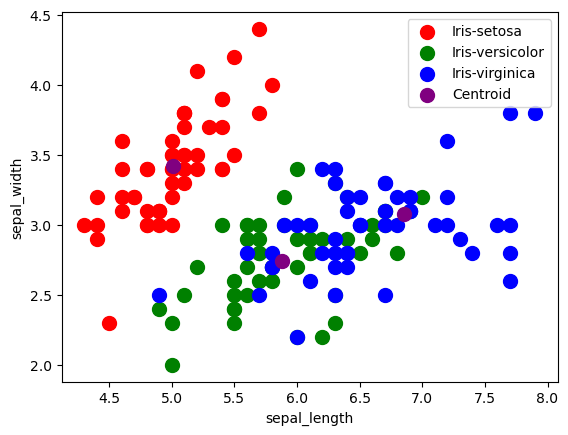

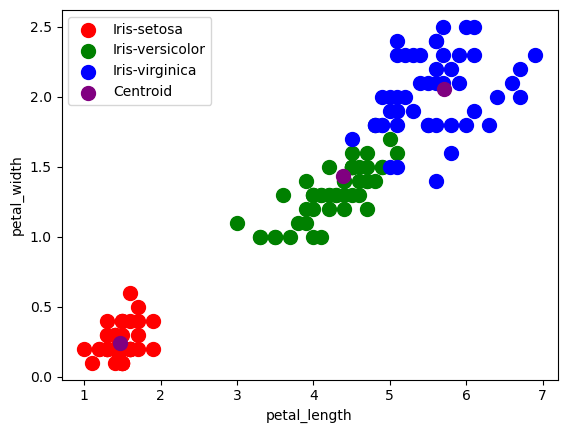

In [258]:
# plot the result centroids from the kmeans clustering algorithm on the original classification provided by iris.csv (same clusters as the methods above. The color may be different since as we can assign one species' name to another without losing generality from the results from plot_clustering)

def plot_centroids_on_iris_clustering(): 

    # PLOT sepal_length against sepal_width
    for i in range(test.k_clusters):
        plt.scatter(iris[iris['species'] == type[i]].iloc[:,0], iris[iris['species'] == type[i]].iloc[:,1], s=100, c = color[i], label = type[i] )
    plt.scatter(test.mu[:, 0], test.mu[:, 1], s = 100, c = 'purple', label = "Centroid" )
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    plt.legend()
    plt.show()

    # PLOT petal_length against petal_width
    for i in range(test.k_clusters):
        plt.scatter(iris[iris['species'] == type[i]].iloc[:,2], iris[iris['species'] == type[i]].iloc[:,3], s=100, c = color[i], label = type[i] )
    plt.scatter(test.mu[:, 2], test.mu[:, 3], s = 100, c = 'purple', label = "Centroid" )
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.legend()
    plt.show() 

plot_centroids_on_iris_clustering()




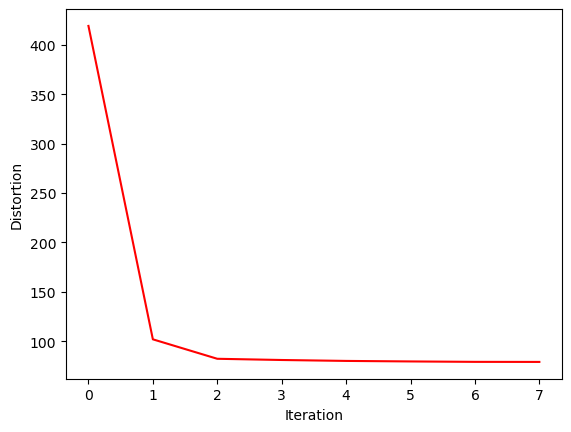

In [259]:
def plot_distortion():
    d = np.array(test.distortion_arr)
    plt.plot(range(len(d)), d, c ='red')
    plt.xlabel("Iteration")
    plt.ylabel("Distortion")
    plt.show()

plot_distortion()

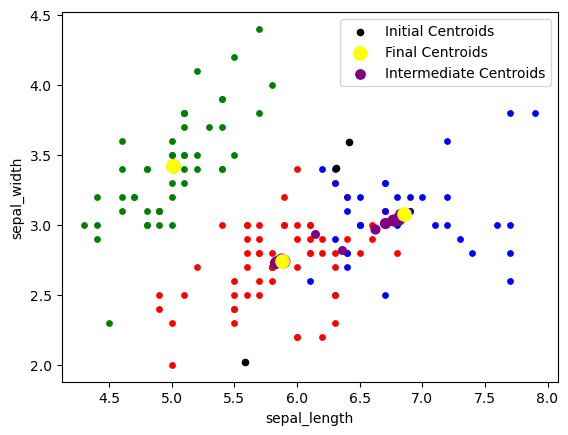

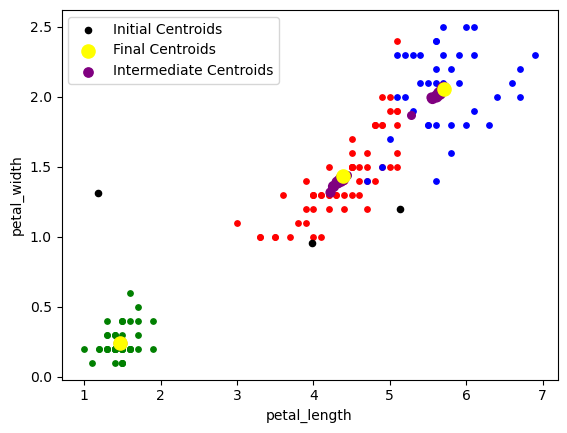

In [267]:
def plot_learning_process(feature_x, feature_y): # For 3 clusters
    #final_assignment array
    res = test.get_assignment()

    # PLOT feature_y against feature_X
    for i in range(test.k_clusters):
        plt.scatter(test.x[res == i, feature_x], test.x[res == i, feature_y], c= color[i] , s=15)

    c_size = 20
    res = np.transpose(test.mu_arr)
    for i in range(len(test.mu_arr)):
        c_label = ''
        c_color = 'purple'
        if (i == 0): 
            c_label = 'Initial Centroids'
            c_color = "black"
        if (i == len(test.mu_arr)-1): 
            c_label = 'Final Centroids'
            c_color = "yellow"
        plt.scatter(test.mu_arr[i][:, feature_x], test.mu_arr[i][:, feature_y], s = c_size, c = c_color, label = c_label)
        c_size += 10
    plt.scatter([], [], c = "purple", s=45, label="Intermediate Centroids")
    plt.legend()
    plt.show()

#Plot learning process based on sepal_width against sepal_length
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plot_learning_process(0,1)

#Plot learning process based on sepal_width against sepal_length
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plot_learning_process(2,3)

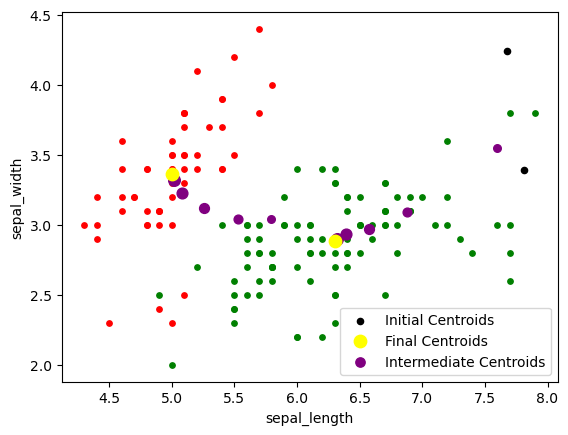

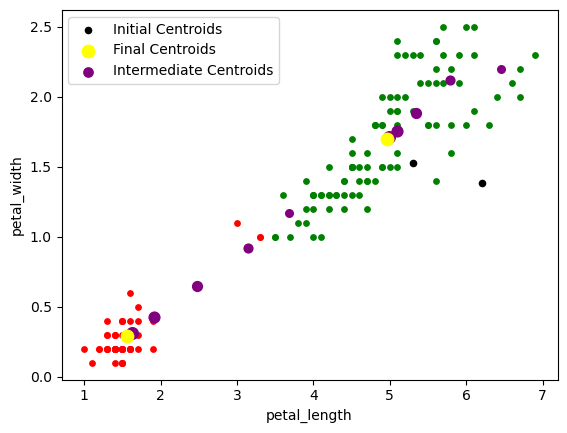

In [273]:
test = k_means(2)
test.iterate()

#Plot learning process based on sepal_width against sepal_length
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plot_learning_process(0,1)

#Plot learning process based on sepal_width against sepal_length
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plot_learning_process(2,3)

In [277]:
#3 clusters
test = k_means(3)
test.iterate()

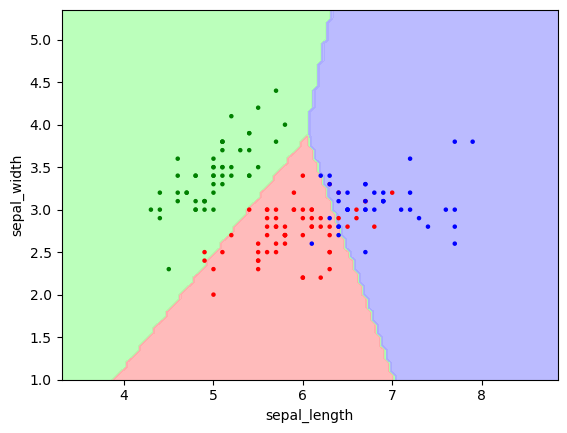

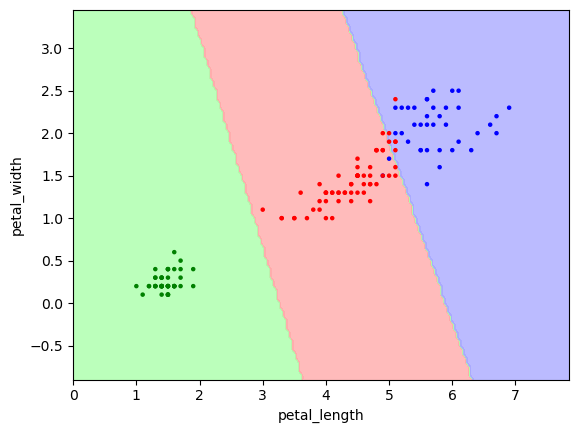

In [282]:
from matplotlib.colors import ListedColormap

# Get the final cluster assignments
final_assignment = test.get_assignment()

def plot_decision_boundaries(feature_x, feature_y): #feature_x, feature_y are integer positions of the column corresponding to the features that needs to be plotted 
    # Plot the clusters
    x_min, x_max = test.x[:, feature_x].min() - 1, test.x[:, feature_x].max() + 1
    y_min, y_max = test.x[:, feature_y].min() - 1, test.x[:, feature_y].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
    assign_grid = np.zeros(xx.shape)
    for x in range(assign_grid.shape[0]):
        for y in range(assign_grid.shape[1]):
            assign_grid[x][y] = -1
            min_dist = float('inf') 
            for k in range(test.k_clusters):
                centroid = test.mu[k][[feature_x, feature_y]]
                distance_to_k = np.sum(np.square(np.subtract(np.array([xx[x][y], yy[x][y]]), centroid)))
                if distance_to_k < min_dist:
                        min_dist = distance_to_k
                        assign_grid[x][y] = k

    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    pcmap = ListedColormap(['red', 'green', 'blue'])
    plt.contourf(xx, yy, assign_grid, cmap=cmap, alpha=.8)
    plt.scatter(test.x[:, feature_x], test.x[:, feature_y], c=test.get_assignment(), cmap=pcmap, s = 5)
    plt.show()

#Plot decision boundaries based on sepal_width against sepal_length
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plot_decision_boundaries(0,1)

#Plot learning process based on sepal_width against sepal_length
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plot_decision_boundaries(2,3)
 
    

     
